In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from joblib import load
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import linkage, dendrogram
import random
from sklearn.decomposition import PCA

df = load("../../preprocessing/clustering_data.joblib")
df.head()

,pca_0,pca_1
0,0.753289,0.401192
1,0.688804,0.493711
2,0.681094,0.466273
3,0.474369,0.449348
4,0.663911,0.517927


In [2]:
df.describe()

,pca_0,pca_1
count,1500.000000,1500.000000
mean,0.392984,0.438740
std,0.193394,0.201703
min,0.000000,0.000000
25%,0.250750,0.284351
50%,0.368573,0.425142
75%,0.509459,0.593557
max,1.000000,1.000000


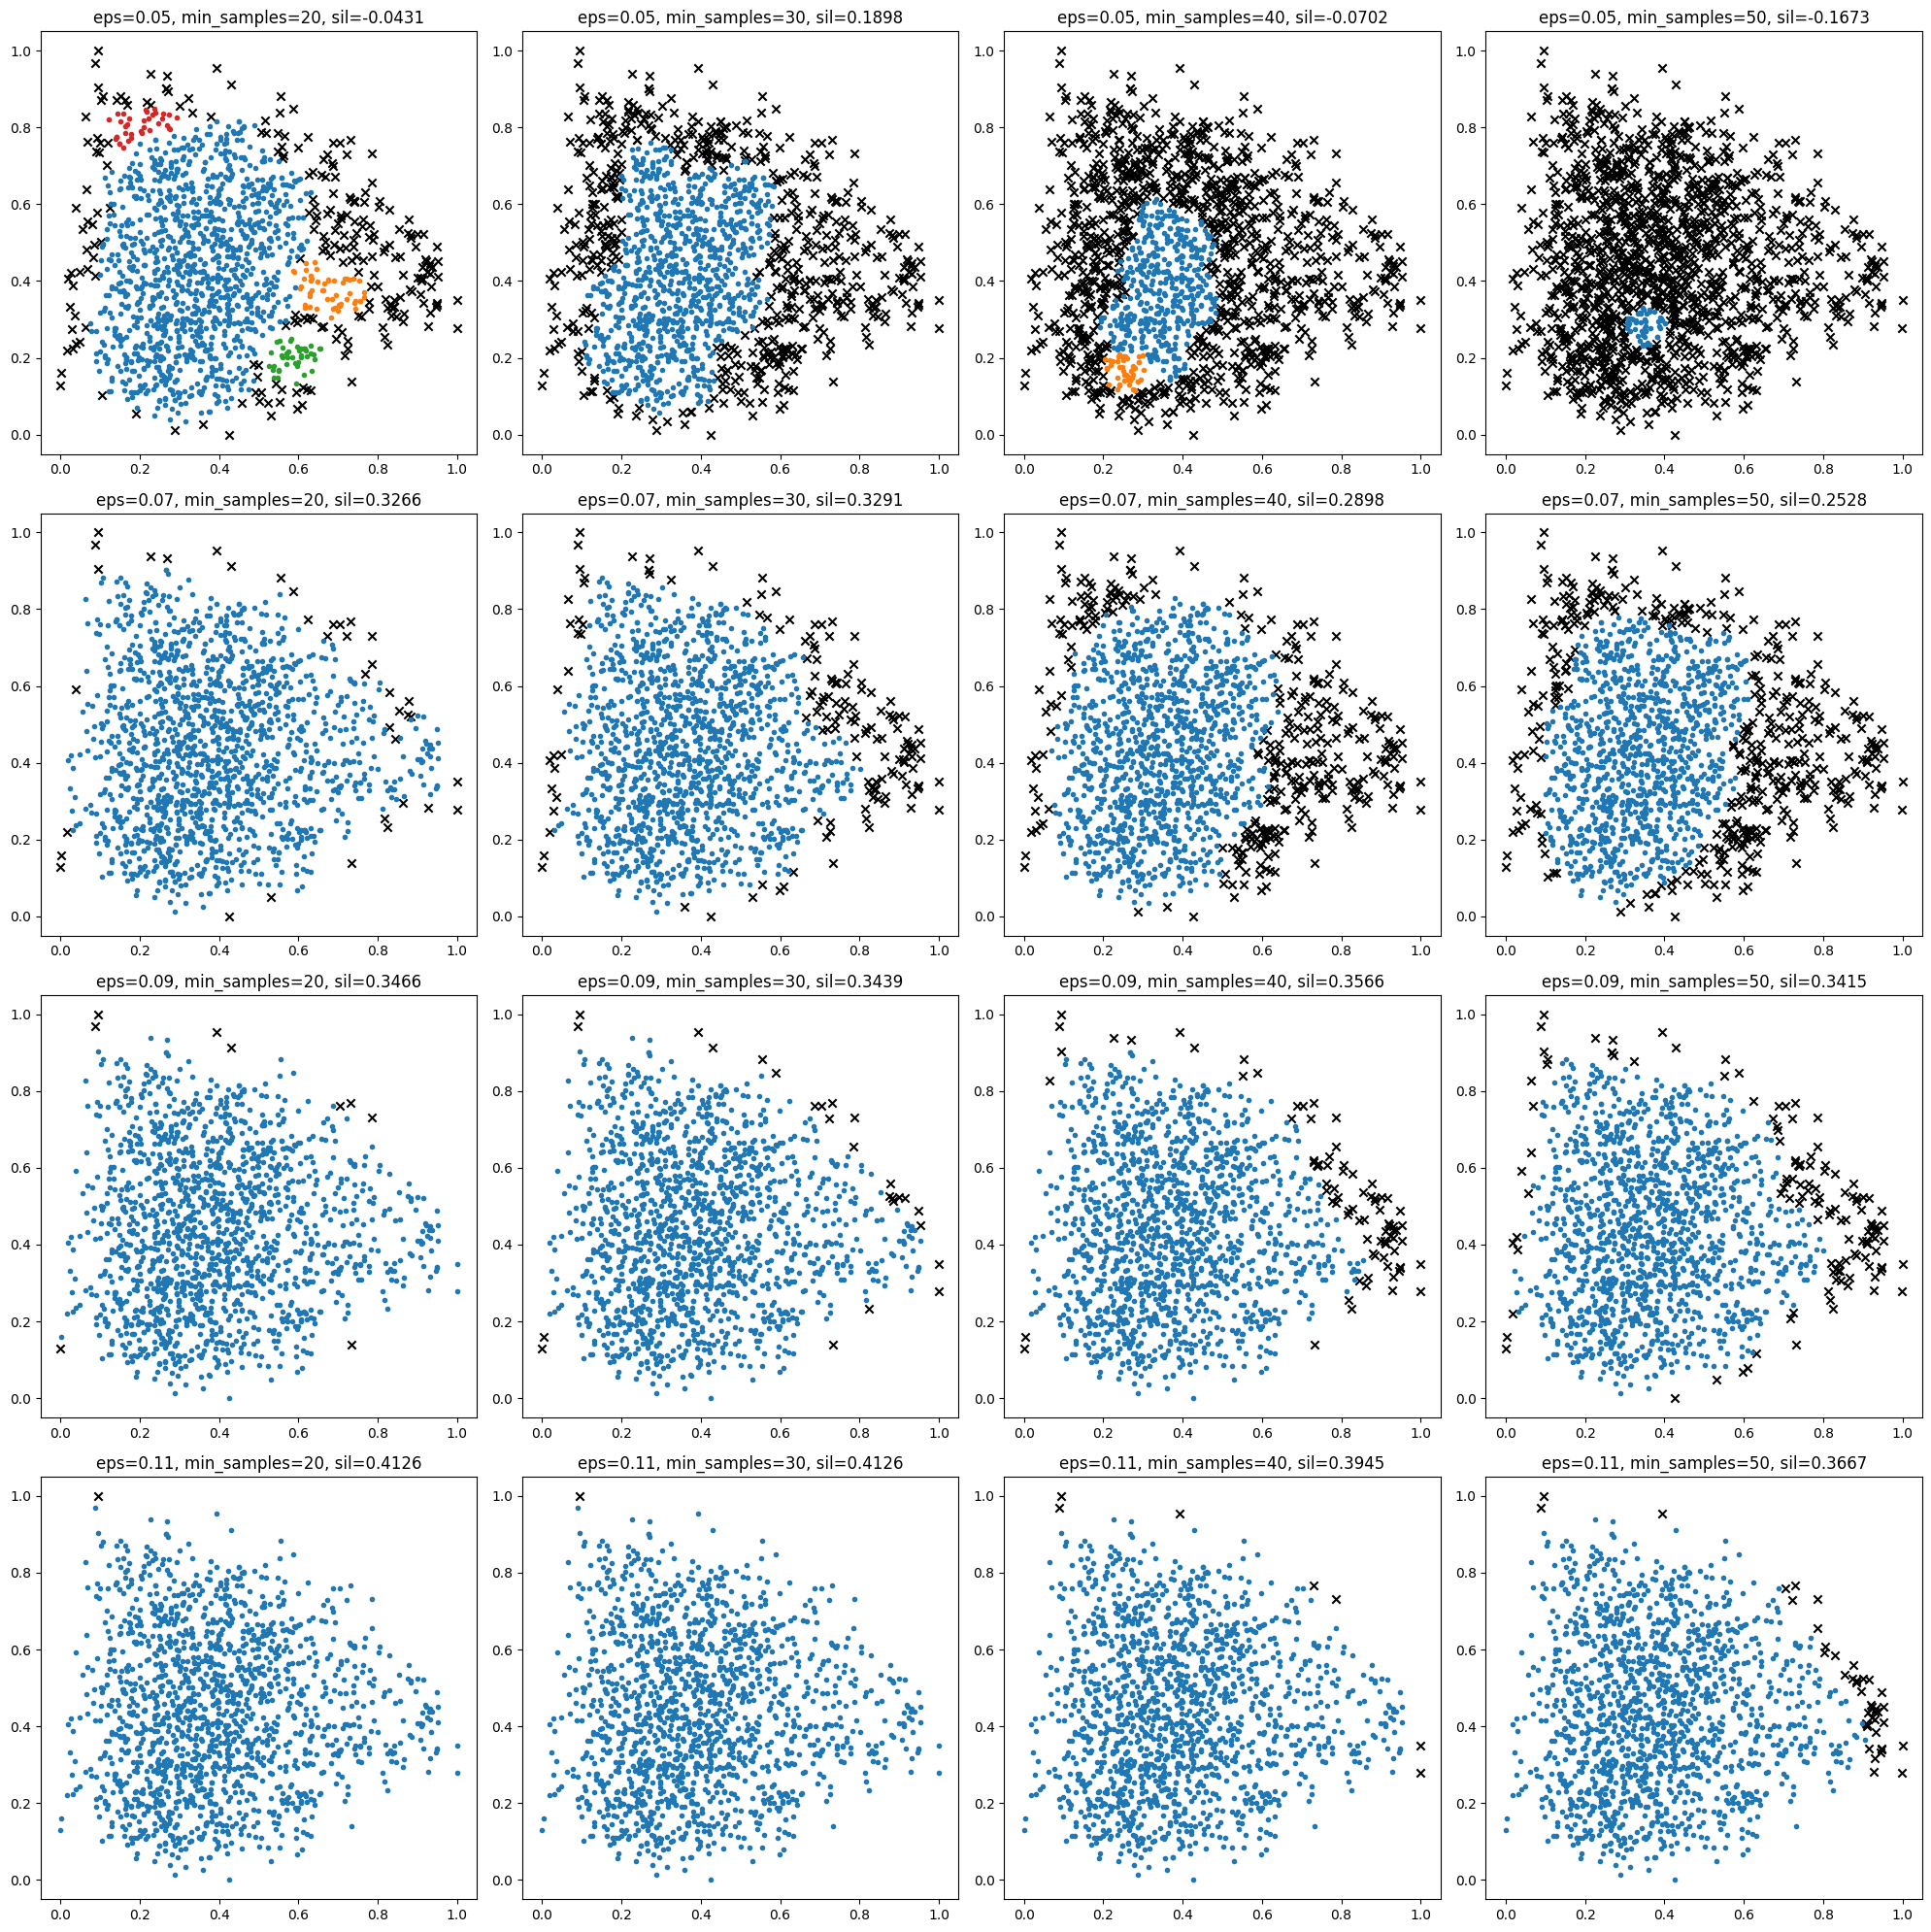

In [3]:
eps_values = np.arange(0.05, 0.13, 0.02)
min_samples = range(20, 51, 10)
fig = plt.figure(figsize=(20, 20))
plot_index = 1
silhouettes = []

for eps_value in eps_values:
    scores_per_eps = 0
    for samples in min_samples:
        model = DBSCAN(eps=eps_value, min_samples=samples)
        labels = model.fit_predict(df)

        ax = fig.add_subplot(len(eps_values), len(min_samples), plot_index)
        plot_index += 1

        unique_labels = np.unique(labels)
        if len(unique_labels) > 1:
            for cluster_label in unique_labels:
                if cluster_label == -1:
                    cluster = df[labels == cluster_label]
                    ax.scatter(cluster['pca_0'], cluster['pca_1'], label=f'sum {cluster_label}', marker='x', color='black')
                else:
                    cluster = df[labels == cluster_label]
                    ax.scatter(cluster['pca_0'], cluster['pca_1'], label=f'cluster {cluster_label}', marker='.')

            ax.set_title(f'eps={round(eps_value, 2)}, min_samples={round(samples, 2)}, sil={round(silhouette_score(df, labels),4)}')
            scores_per_eps += silhouette_score(df, labels)

    silhouettes.append(scores_per_eps / len(min_samples))

plt.tight_layout()
plt.show()
     

Text(0, 0.5, 'silhouette score')

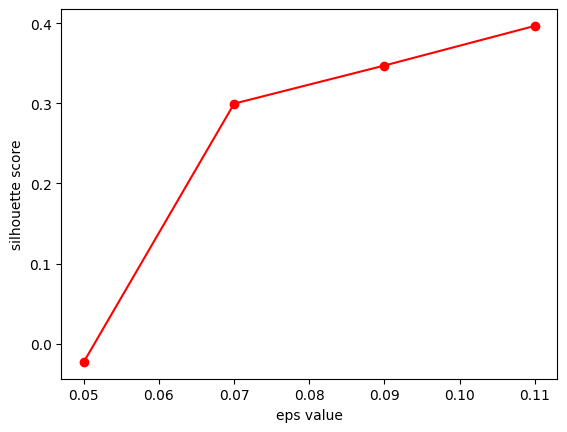

In [4]:
plt.plot(eps_values, silhouettes, marker='o', c='r')
plt.xlabel('eps value')
plt.ylabel('silhouette score')

Text(0.5, 1.0, 'DBSCAN')

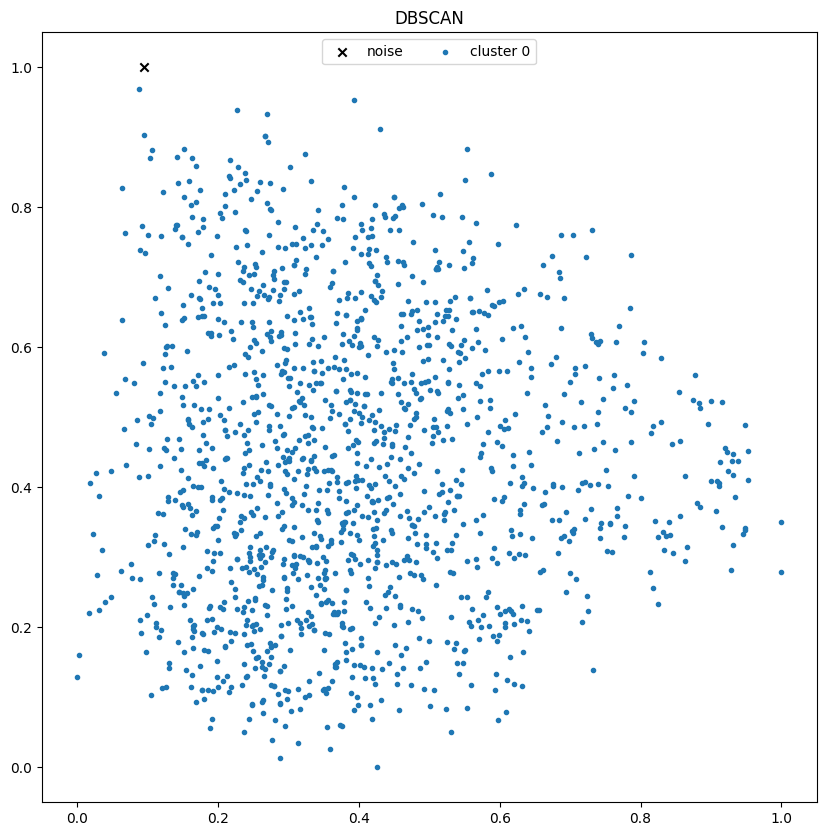

In [5]:
model = DBSCAN(eps=0.11, min_samples=30)
model.fit(df)
plt.figure(figsize=(10,10))
for cluster_label in range(-1, max(model.labels_) + 1):
      cluster = df[cluster_label == model.labels_]
      if cluster_label == -1:
        plt.scatter(cluster['pca_0'], cluster['pca_1'], label=f'noise', marker='x', color='black')
      else:
        plt.scatter(cluster['pca_0'], cluster['pca_1'], label=f'cluster {cluster_label}', marker='.')
plt.legend(loc='upper center', ncol=15)
plt.title('DBSCAN')